## Computer Vision 13th Assignment
## Melika Heydari Rad 
#### Maktabkhooneh Course 

___



یک تصویر حاوی چهره لود کنید و با وارد کردن دستی مختصات چهره و با فیلتر گذاری‌هایی که خواندیم کاری کنید چهره مات شود.

برای این کار باید:

    ابتدا ناحیه‌ی مربوط به چهره را ببرید(با numpy )
    سپس ناحیه‌ی چهره که بریده شده را با فیلترهایی با سایز بزرگ blur کنید.
    در نهایت این ناحیه‌ی بریده شده‌ی مات را با numpy سر جای اصلی خود قرار دهید.



___

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

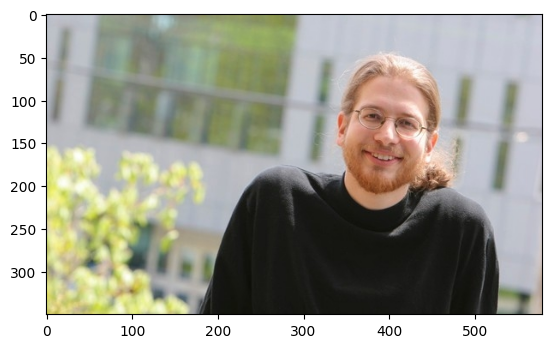

In [9]:
img = cv2.imread('erik_demaine.jpg')
plt.imshow(img[:,:,::-1])

In [10]:
img.shape

(350, 579, 3)

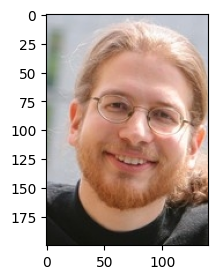

In [30]:
cropped_face = img.copy()[40:240,320:460,:]

plt.figure(figsize=(3,3))
plt.imshow(cropped_face[:,:,::-1]);

### Gaussian Blur

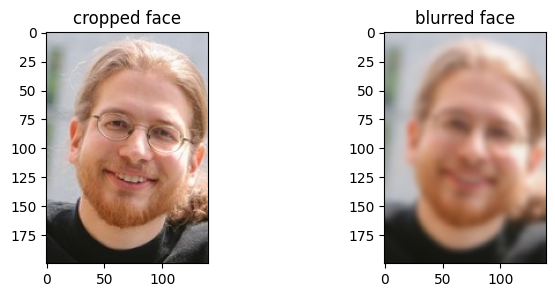

In [31]:
cropped = cropped_face.copy()
blurred_face = cv2.GaussianBlur(cropped, (15,15), 0)

plt.figure(figsize=(8,3))

plt.subplot(121);plt.imshow(cropped_face[:,:,::-1]);plt.title('cropped face');
plt.subplot(122);plt.imshow(blurred_face[:,:,::-1]);plt.title('blurred face');

Text(0.5, 1.0, 'final result ! \n(img with blurred face)')

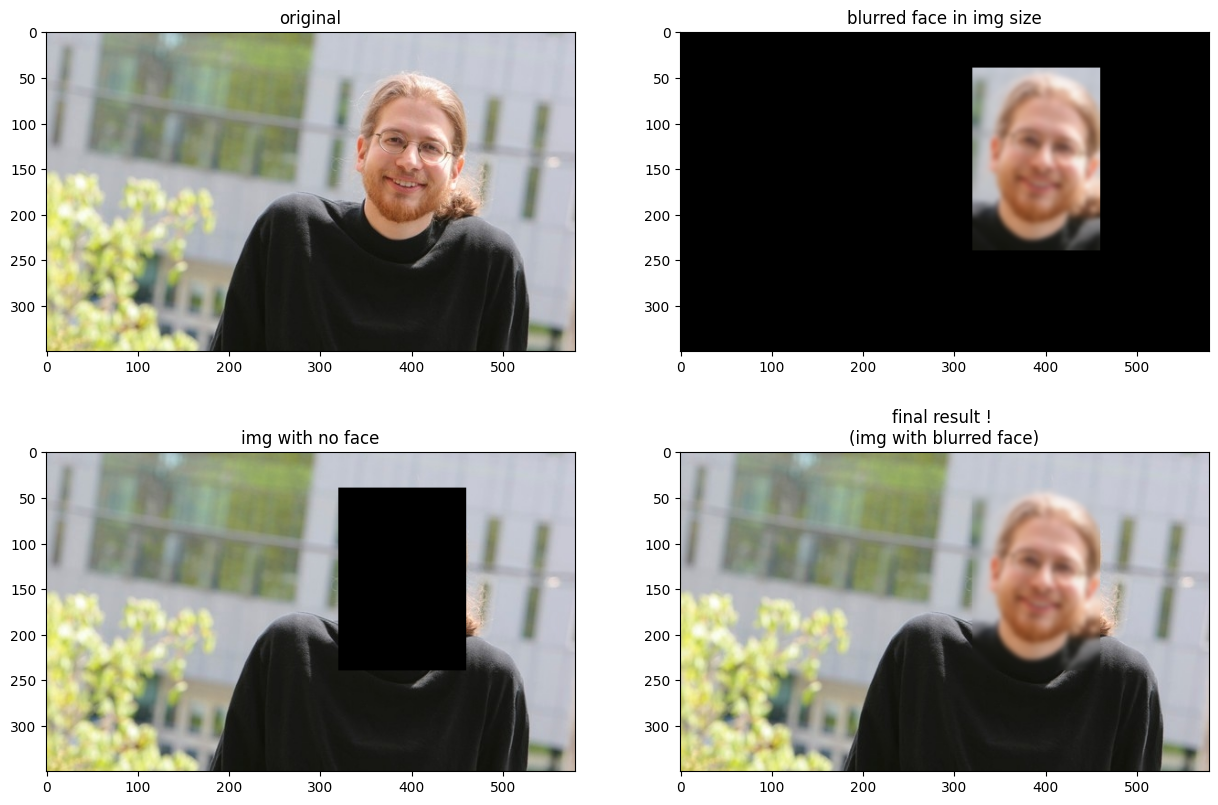

In [32]:
# blurred cropped, in img size
temp = np.zeros_like(img, dtype='uint8')
temp[40:240,320:460,:] = cv2.bitwise_or(temp[40:240,320:460,:], blurred_face)

# image with no face
img_noface = img.copy()
img_noface[40:240,320:460,:]=0

# final result
img_with_blurred_face = cv2.add(img_noface, temp)

plt.figure(figsize=(15,10))

plt.subplot(221);plt.imshow(img[:,:,::-1]); plt.title('original')
plt.subplot(222);plt.imshow(temp[:,:,::-1]); plt.title('blurred face in img size')
plt.subplot(223);plt.imshow(img_noface[:,:,::-1]); plt.title('img with no face')
plt.subplot(224);plt.imshow(img_with_blurred_face[:,:,::-1]); plt.title('final result ! \n(img with blurred face)')

### simple blurring by non-weighted averaging

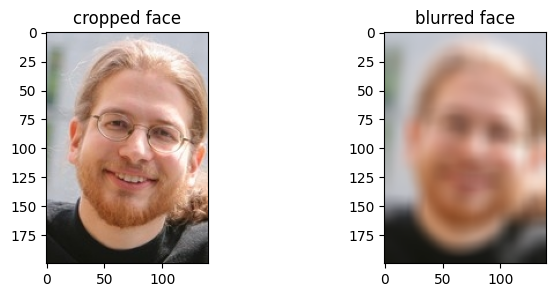

In [33]:
cropped = cropped_face.copy()
kernel_15x15 = np.ones((15, 15), np.float32) / 225
blurred_face = cv2.filter2D(cropped, -1, kernel_15x15)
# plt.imshow(blurred2[...,::-1]);plt.title("blurred with 15x15 filter");

plt.figure(figsize=(8,3))

plt.subplot(121);plt.imshow(cropped_face[:,:,::-1]);plt.title('cropped face');
plt.subplot(122);plt.imshow(blurred_face[:,:,::-1]);plt.title('blurred face');

Text(0.5, 1.0, 'final result ! \n(img with blurred face)')

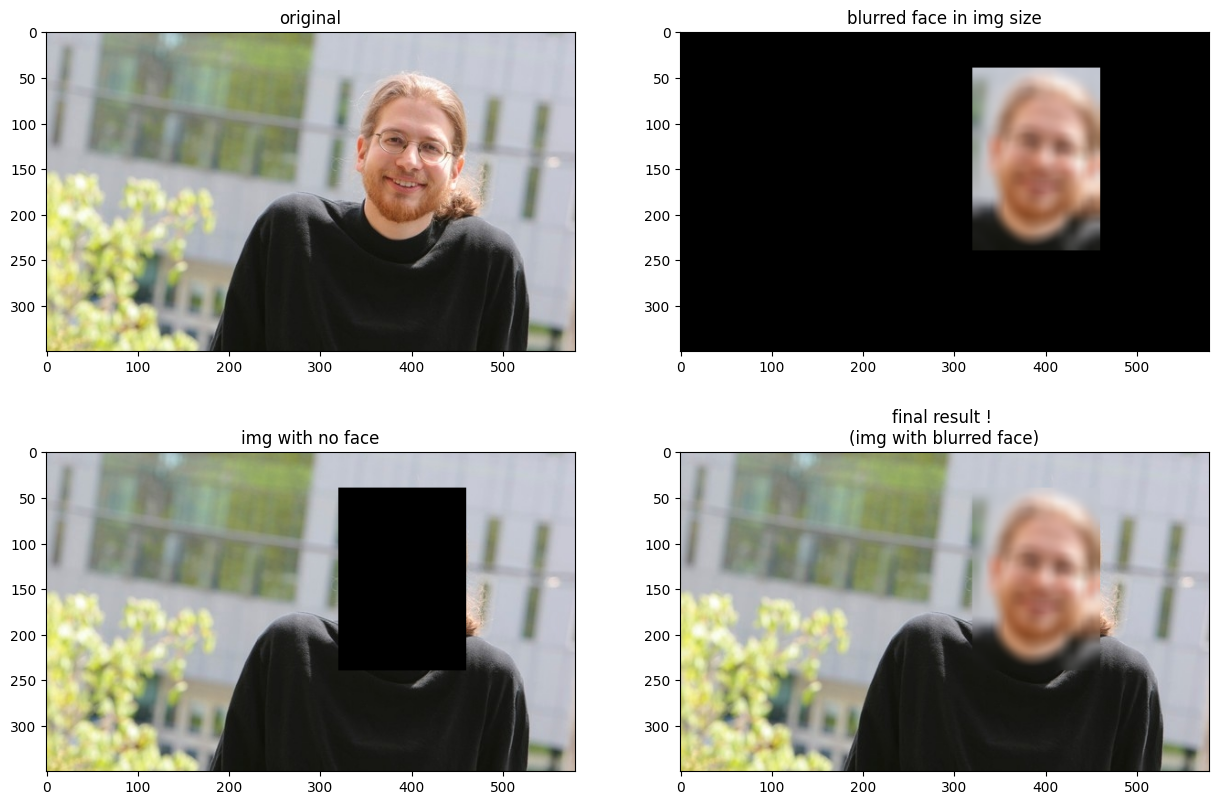

In [34]:
# blurred cropped, in img size
temp = np.zeros_like(img, dtype='uint8')
temp[40:240,320:460,:] = cv2.bitwise_or(temp[40:240,320:460,:], blurred_face)

# image with no face
img_noface = img.copy()
img_noface[40:240,320:460,:]=0

# final result
img_with_blurred_face = cv2.add(img_noface, temp)

plt.figure(figsize=(15,10))

plt.subplot(221);plt.imshow(img[:,:,::-1]); plt.title('original')
plt.subplot(222);plt.imshow(temp[:,:,::-1]); plt.title('blurred face in img size')
plt.subplot(223);plt.imshow(img_noface[:,:,::-1]); plt.title('img with no face')
plt.subplot(224);plt.imshow(img_with_blurred_face[:,:,::-1]); plt.title('final result ! \n(img with blurred face)')